#### The objective of this Google Colab file is to build a publishable and fully reproducible project that uses Machine Learning (4-5 different models). This entire file contains all the following major three steps:



*   Dataset Domain (Banking): A comprehensive detailed information  about the nature and domain of the dataset including the number if rows, columns, type of data, etc.

*   STEP 1: Well documented Python code to read, explore and clean data (automated processes and no hand edit on raw data).

*   STEP 2: Well documented Python code to manipulate, wrangle and visualize data.

*   STEP 3: Well documented Python code to run ML models and make publication-worthy figures or tables.

## ***Dataset Domain: Banking***

This data set contains historical data of the customers who have taken loans from a German bank and the bank is facing issues with loan defaulters. The bank intends to build a machine learning model to predict whether the customer will default or not based on historical data. The bank has historical information on relevant features for each customer such as employment duration, existing loans count, saving balance, percentage of income, age, default status.

The data set has 17 columns and 1000 rows. Columns are described below and each row is a customer.

- checking_balance - refers to the amount of money available in a 'checking account' (a.k.a current account) of the customer for everyday financial transactions ("unknown", "< 0 DM", "1 - 200 DM" and "> 200 DM")
- months_loan_duration - The duration, in months, since the loan was taken
- credit_history - The credit history of each customer ("good", "critical", "poor", "very good" and "perfect")
- purpose - The purpose for which the loan was taken ("furniture/appliances", "car", "business", "education" and "renovations")
- amount - The amount of loan taken by the customer
- savings_balance - refers to the amount of money available in a 'savings account' of the customer for accumulating funds over time and earning interest ("< 100 DM", "unknown", "100 - 500 DM", "500 - 1000 DM" and "> 1000 DM")
- employment_duration - The duration of the customer's employment ("1 - 4 years", "> 7 years", "4 - 7 years", "< 1 year" and "unemployed")
- percent_of_income - The installment rate, expressed as a percentage of disposable income, indicates the portion of income being utilized to make loan payments
- years_at_residence - The duration of the customer's current residence
- age - The age of the customer
- other_credit - Whether the customer has taken any other credits ("none", "bank" and "store")
- housing - The type of housing the customer has ("own", "rent" and "other")
- existing_loans_count - signifies the quantity of ongoing loans (currently active credit lines) already held by a customer with this bank
- job - The job type of the customer ("skilled", "unskilled", "management" and "unemployed")
- dependents - Whether the customer has any dependents
- phone - Whether the customer has a phone ("no" and "yes")
- default - Default status (Target column - "no" and "yes"): The target variable indicating whether the customer defaulted on the loan or not.

NOTE: "DM" stands for "Deutsche Mark" (previously legal currency of Germany)

# ***STEP 1: Well documented Python code to read, explore and clean data (automated processes and no hand edit on raw data).***

In [ ]:
import pandas as pd
import numpy as np

#Path to the bank dataset CSV file
file_path = 'credit.csv'

#Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

#Understanding the type and contents of the dataset
print(df.columns)
print(df.info())
df

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                  

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [ ]:
#Summary Statistics of the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [ ]:
#Statistics for the qualitative categorical columns
df.describe(include=['O']).T

,count,unique,top,freq
checking_balance,1000,4,unknown,394
credit_history,1000,5,good,530
purpose,1000,6,furniture/appliances,473
savings_balance,1000,5,< 100 DM,603
employment_duration,1000,5,1 - 4 years,339
other_credit,1000,3,none,814
housing,1000,3,own,713
job,1000,4,skilled,630
phone,1000,2,no,596
default,1000,2,no,700


In [ ]:
#Identify qualitative (categorical) columns based on data types
qualitative_columns = [column for column in df.columns if df[column].dtype == 'object']
print("Categorical variables = ", qualitative_columns)

#List to store dictionaries of categories and frequencies
category_frequency_list = []

#Iterate through qualitative columns
for column in qualitative_columns:
    unique_categories = df[column].unique()
    for category in unique_categories:
        frequency = (df[column] == category).sum()
        category_frequency_list.append({'Column': column, 'Category': category, 'Frequency': frequency})

#Create a DataFrame and sort in descending order of frequency under each column
category_frequency_df = pd.DataFrame(category_frequency_list)
category_frequency_df.sort_values(by=['Column', 'Frequency'], ascending=[True, False], inplace=True)

#Reset index for the final DataFrame
category_frequency_df.reset_index(drop=True, inplace=True)
category_frequency_df

Categorical variables =  ['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_duration', 'other_credit', 'housing', 'job', 'phone', 'default']


,Column,Category,Frequency
0,checking_balance,unknown,394
1,checking_balance,< 0 DM,274
2,checking_balance,1 - 200 DM,269
3,checking_balance,> 200 DM,63
4,credit_history,good,530
5,credit_history,critical,293
6,credit_history,poor,88
7,credit_history,very good,49
8,credit_history,perfect,40
9,default,no,700


In [ ]:
#Replacing the category 'car0' with 'car' as it seems to be a typo
df['purpose'] = df['purpose'].str.replace('car0', 'car')

In [ ]:
#Check for missing values
missing_values = df.isnull().sum()

#Check for duplicate rows
duplicate_rows = df.duplicated().sum()

print("Missing Values:")
print(missing_values)
print("\nDuplicate Rows = ", duplicate_rows)

Missing Values:
checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

Duplicate Rows =  0


In [ ]:
#Statistics for the qualitative categorical columns (after corrections to the "purpose" column)
df.describe(include=['O']).T

,count,unique,top,freq
checking_balance,1000,4,unknown,394
credit_history,1000,5,good,530
purpose,1000,5,furniture/appliances,473
savings_balance,1000,5,< 100 DM,603
employment_duration,1000,5,1 - 4 years,339
other_credit,1000,3,none,814
housing,1000,3,own,713
job,1000,4,skilled,630
phone,1000,2,no,596
default,1000,2,no,700


In [ ]:
print(df.columns)
print(df.info())
df

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                  

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [ ]:
csv_filename = 'Germanbankstep1output.csv'
df.to_csv(csv_filename, index=False)

# ***STEP 2: Well documented Python code to manipulate, wrangle and visualize data.***

In [ ]:
import pandas as pd

#Load the CSV file into a DataFrame
csv_filename = 'Germanbankstep1output.csv'
df = pd.read_csv(csv_filename)
df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


<ipython-input-11-ba0aae8c9c3e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=numerical_variable, y='default', ax=ax3,


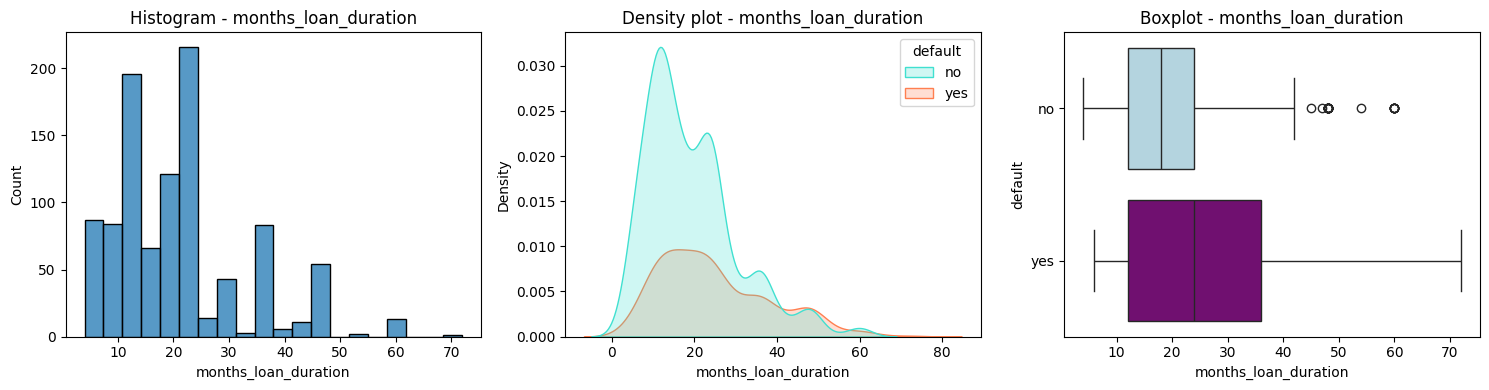

<ipython-input-11-ba0aae8c9c3e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=numerical_variable, y='default', ax=ax3,


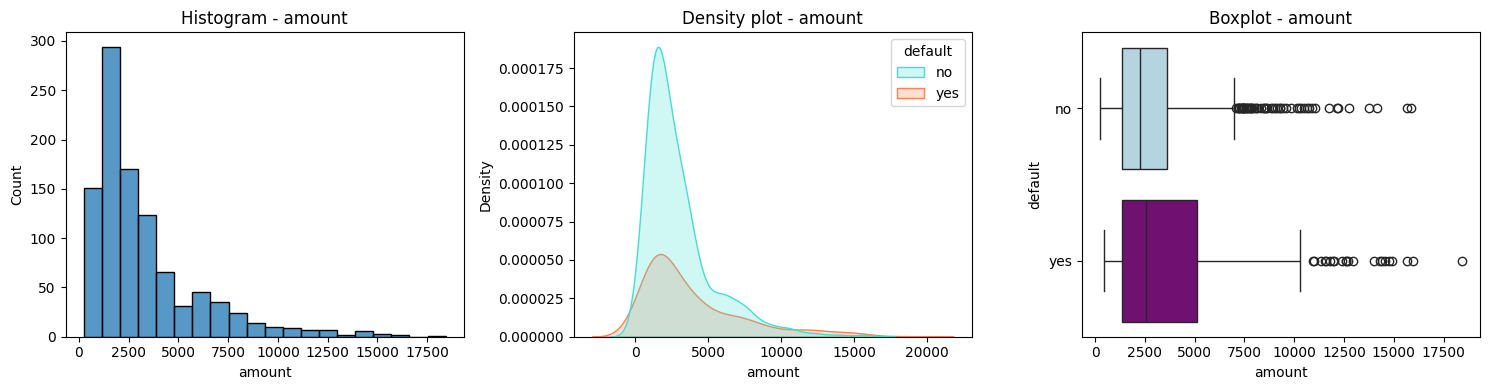

<ipython-input-11-ba0aae8c9c3e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=numerical_variable, y='default', ax=ax3,


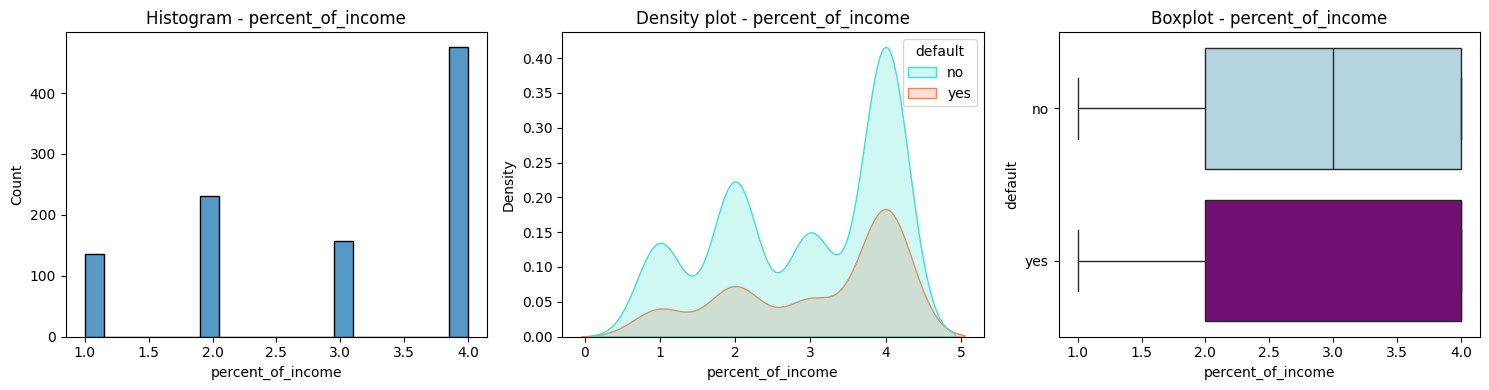

<ipython-input-11-ba0aae8c9c3e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=numerical_variable, y='default', ax=ax3,


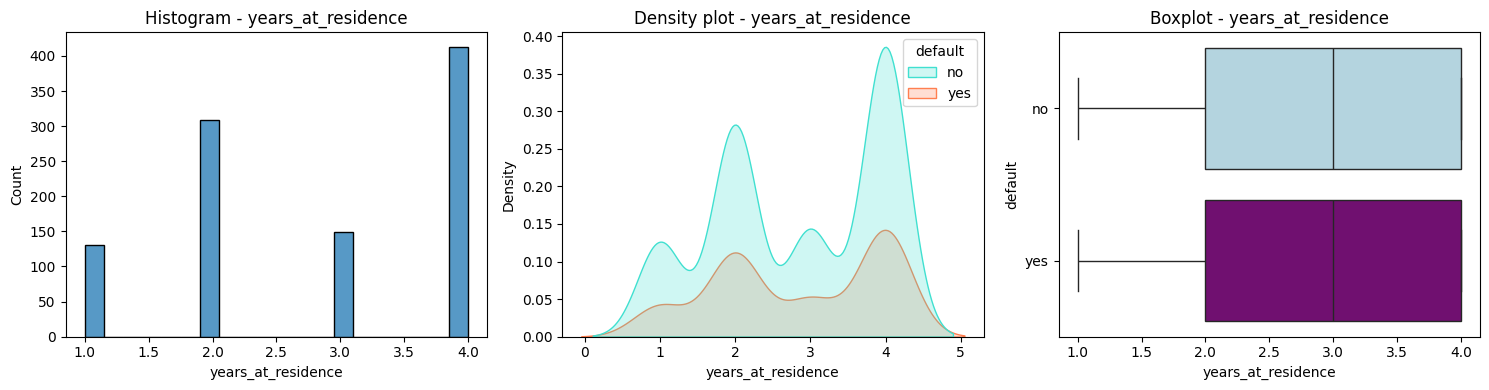

<ipython-input-11-ba0aae8c9c3e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=numerical_variable, y='default', ax=ax3,


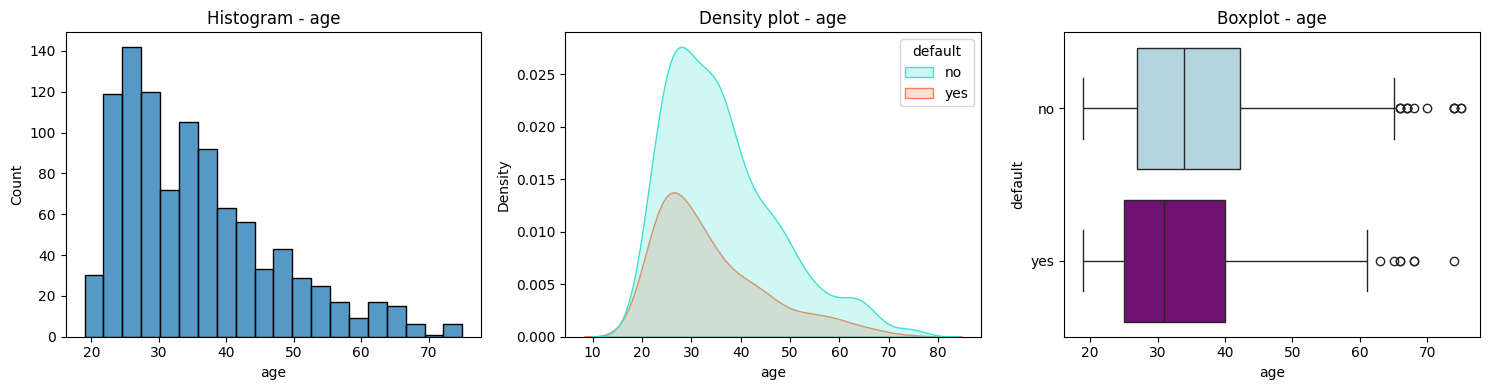

<ipython-input-11-ba0aae8c9c3e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=numerical_variable, y='default', ax=ax3,


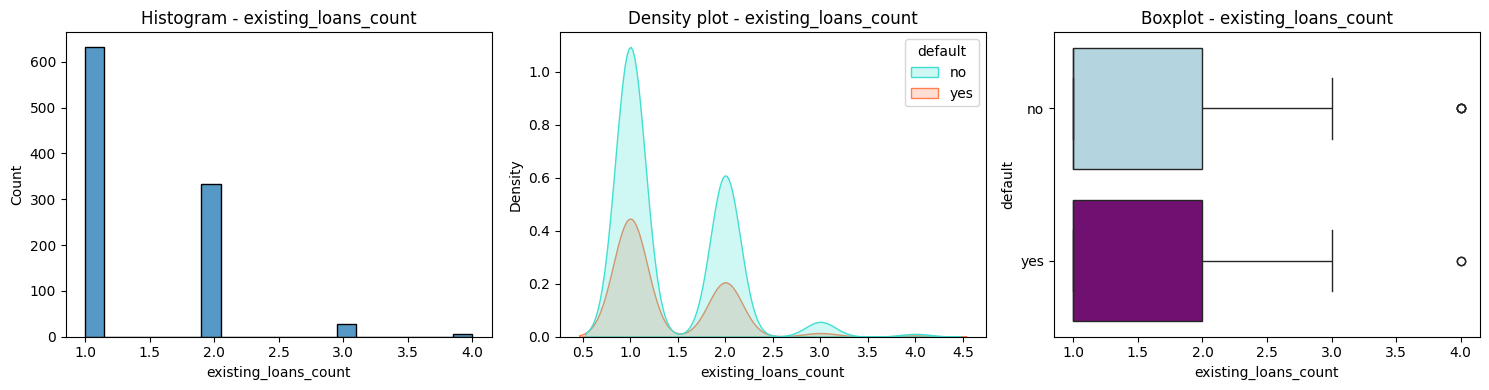

<ipython-input-11-ba0aae8c9c3e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=numerical_variable, y='default', ax=ax3,


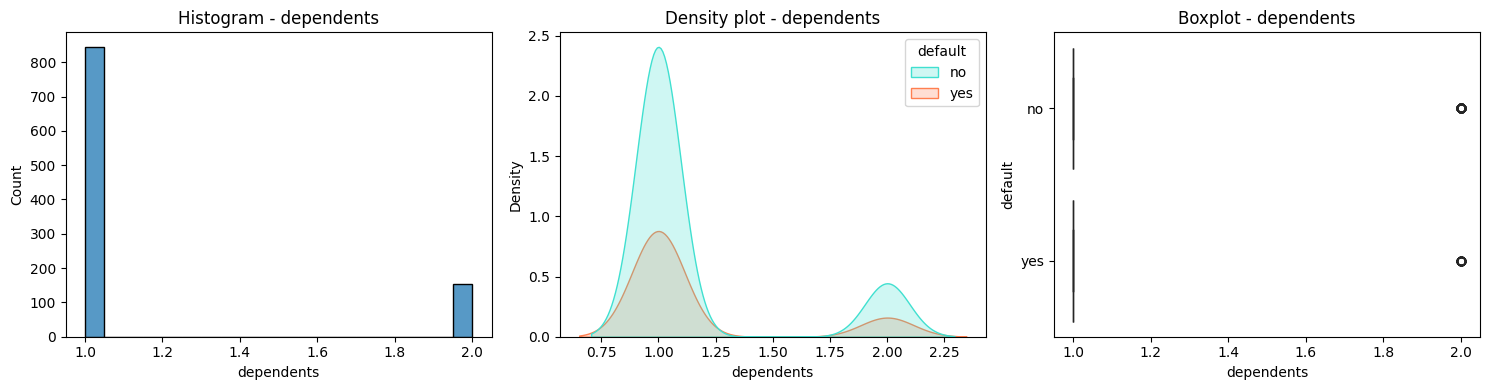

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

#Histogram, Density plot (hue='default') & Boxplots (hue='default') for each numerical column
for numerical_variable in numerical_columns.columns:
    #Create a figure with subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

    #Histogram without any hue='default'
    sns.histplot(data=df, x=numerical_variable, ax=ax1, bins=20, kde=False)
    ax1.set_title(f'Histogram - {numerical_variable}')

    #Kernel density with hue='default'
    sns.kdeplot(data=df, x=numerical_variable, hue='default', ax=ax2, fill=True,
                palette={'yes': 'coral', 'no': 'turquoise'})
    ax2.set_title(f'Density plot - {numerical_variable}')

    #Boxplot with hue='default'
    sns.boxplot(data=df, x=numerical_variable, y='default', ax=ax3,
                palette={'yes': 'purple', 'no': 'lightblue'})
    ax3.set_title(f'Boxplot - {numerical_variable}')

    #Adjust layout
    plt.tight_layout()
    plt.show()

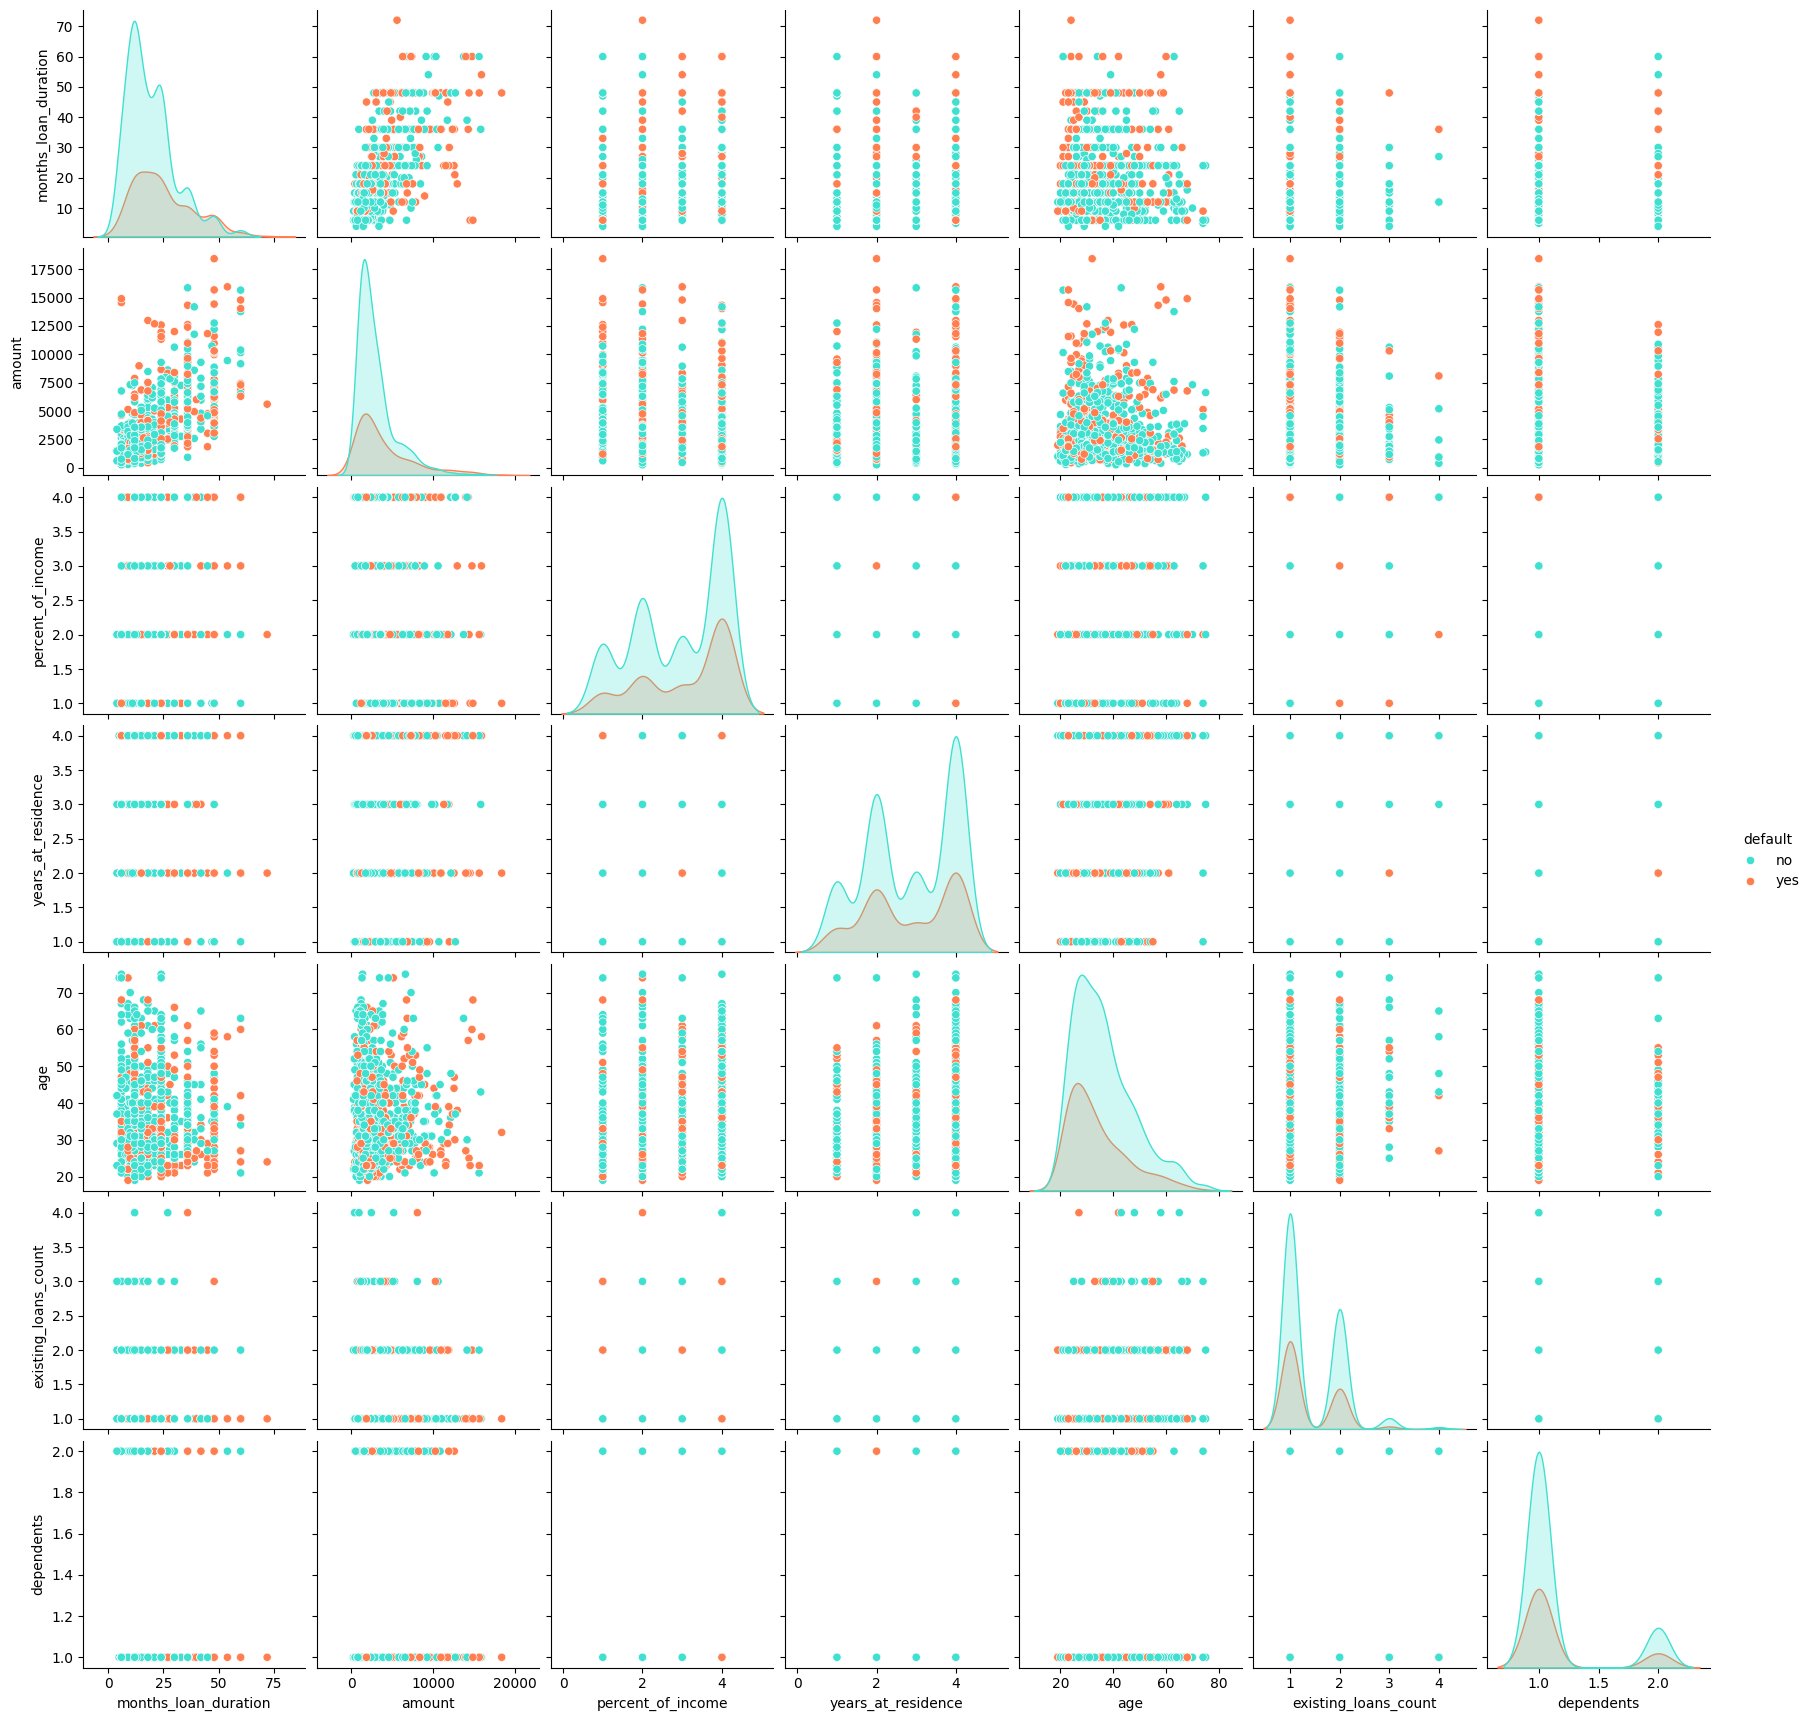

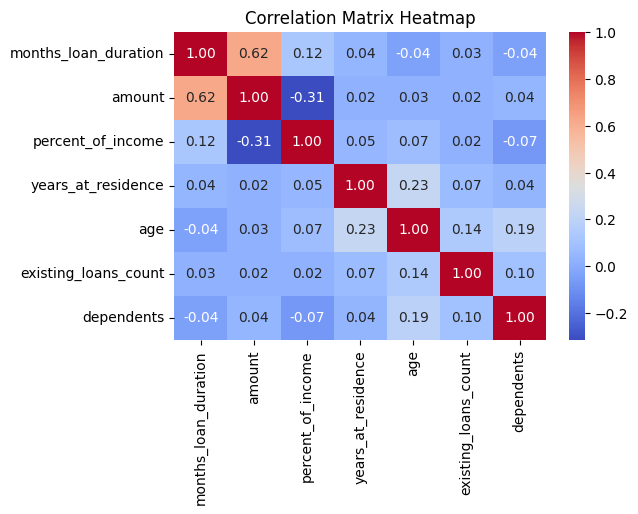

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
months_loan_duration,1.000000,0.624709,0.118046,0.043671,-0.036316,0.028430,-0.043265
amount,0.624709,1.000000,-0.313100,0.023646,0.026298,0.023778,0.041815
percent_of_income,0.118046,-0.313100,1.000000,0.047507,0.072157,0.020997,-0.072543
years_at_residence,0.043671,0.023646,0.047507,1.000000,0.234709,0.067193,0.040455
age,-0.036316,0.026298,0.072157,0.234709,1.000000,0.141287,0.190651
existing_loans_count,0.028430,0.023778,0.020997,0.067193,0.141287,1.000000,0.096978
dependents,-0.043265,0.041815,-0.072543,0.040455,0.190651,0.096978,1.000000


In [ ]:
# Pairplot for numerical features with 'default' as the hue
sns.pairplot(df, hue='default', palette={'yes': 'coral', 'no': 'turquoise'})
plt.show()

# Calculate the correlation matrix (no sign of linearity = Spearman correlation for non-linearity)
correlation_matrix = numerical_columns.corr(method='spearman')

# Heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()
correlation_matrix

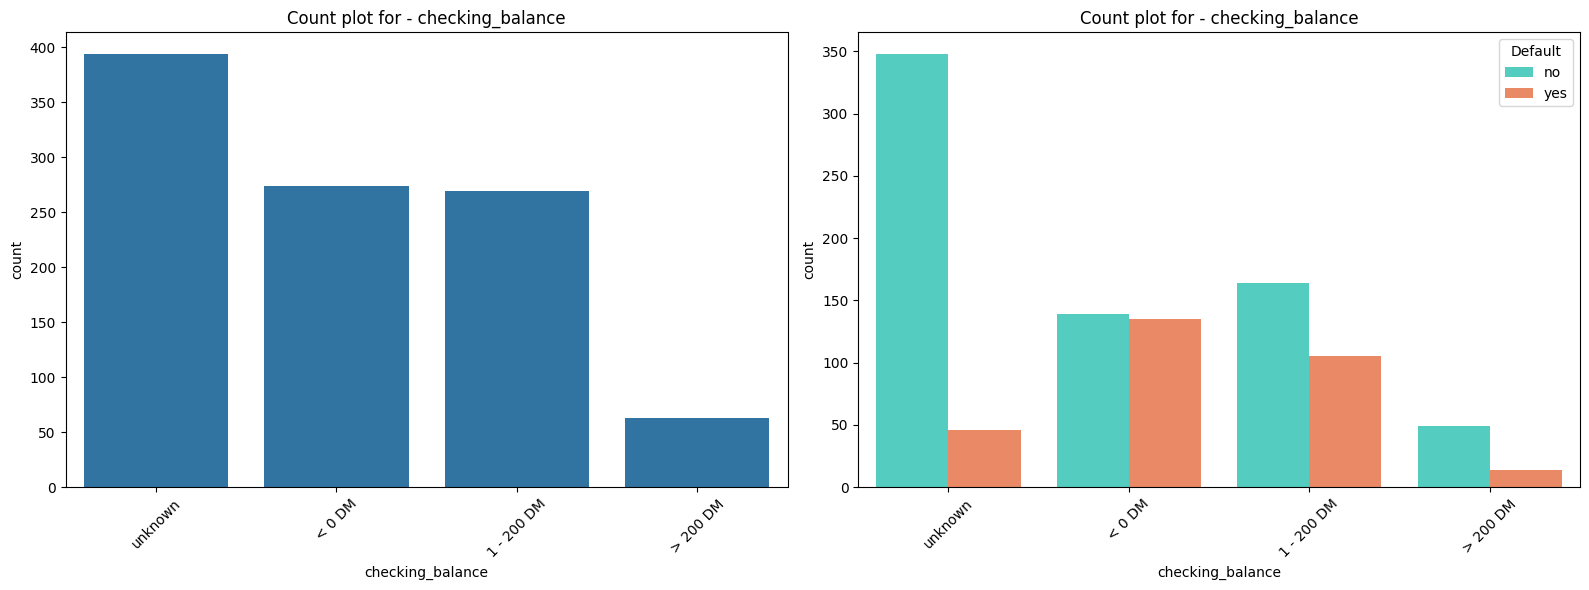

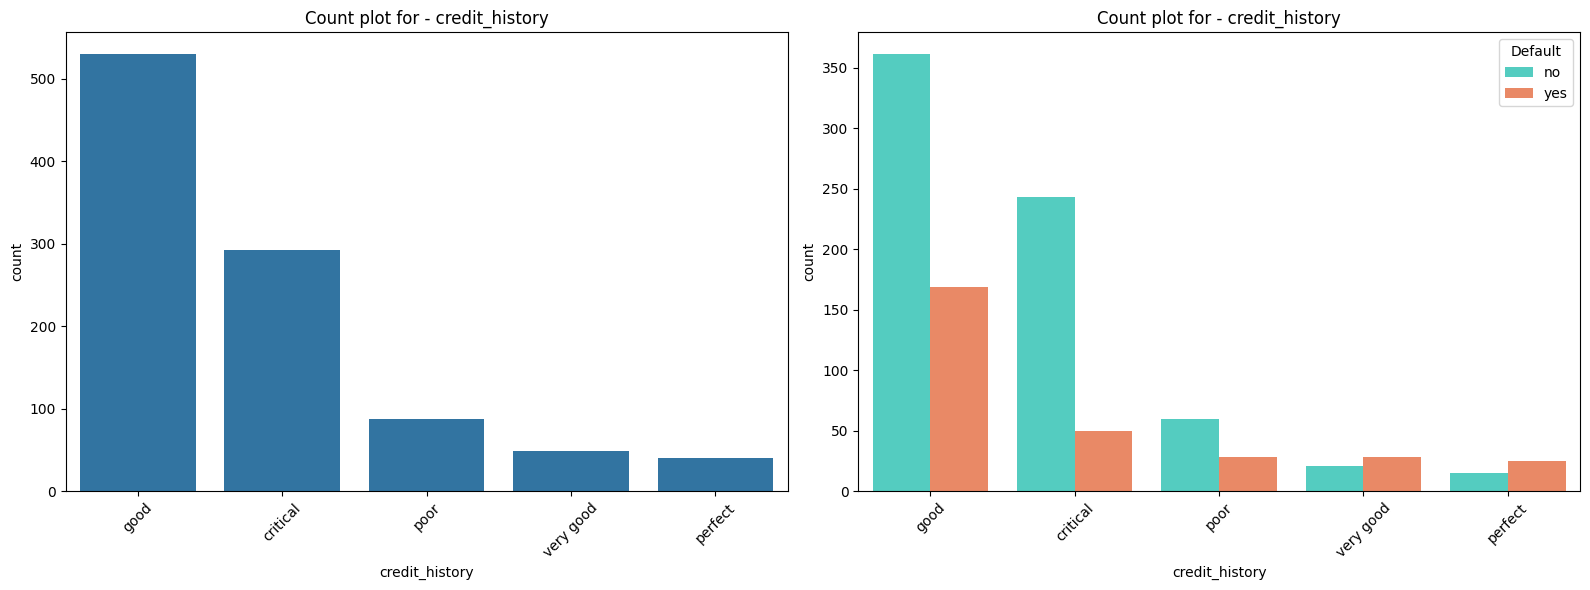

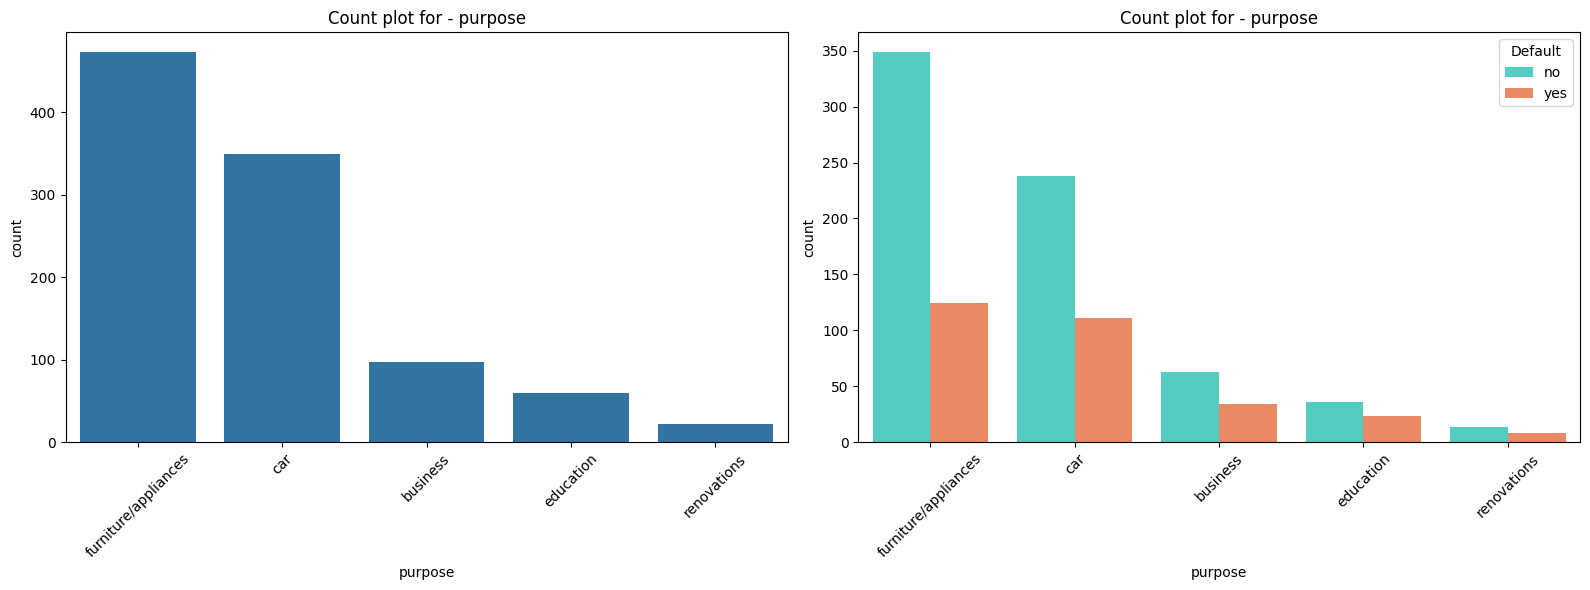

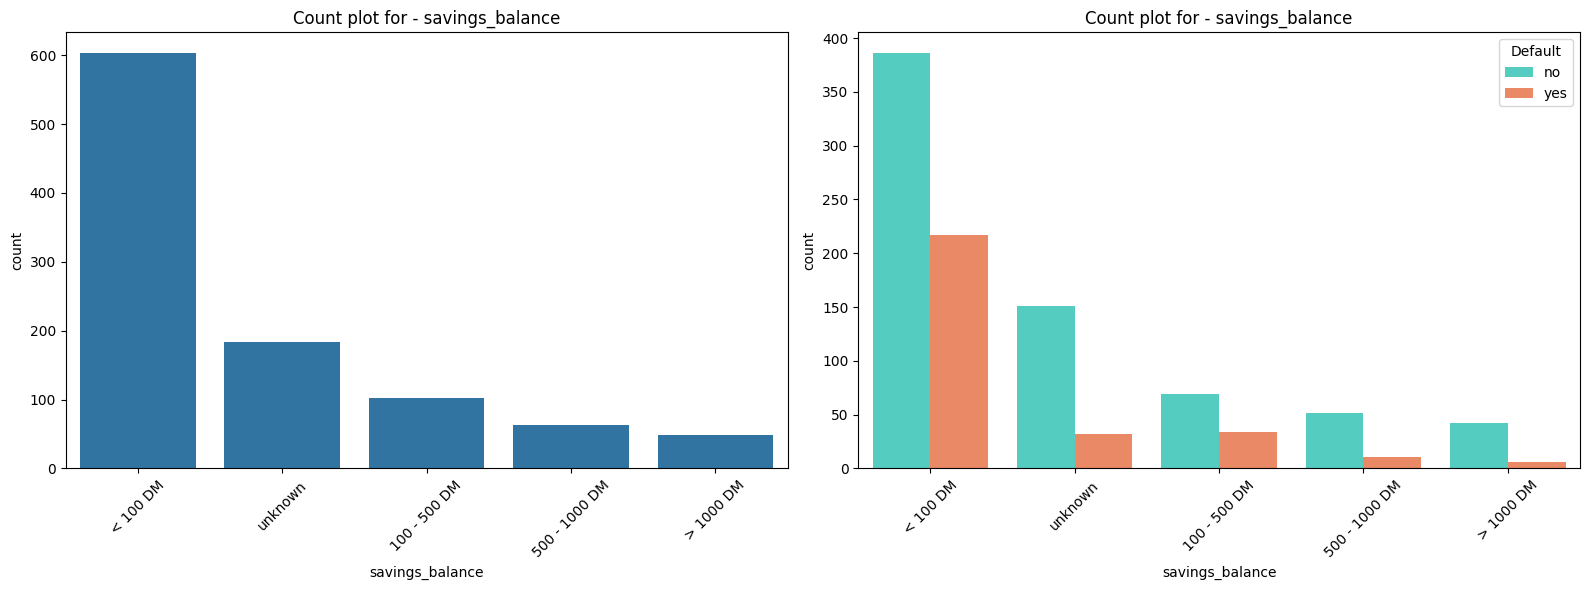

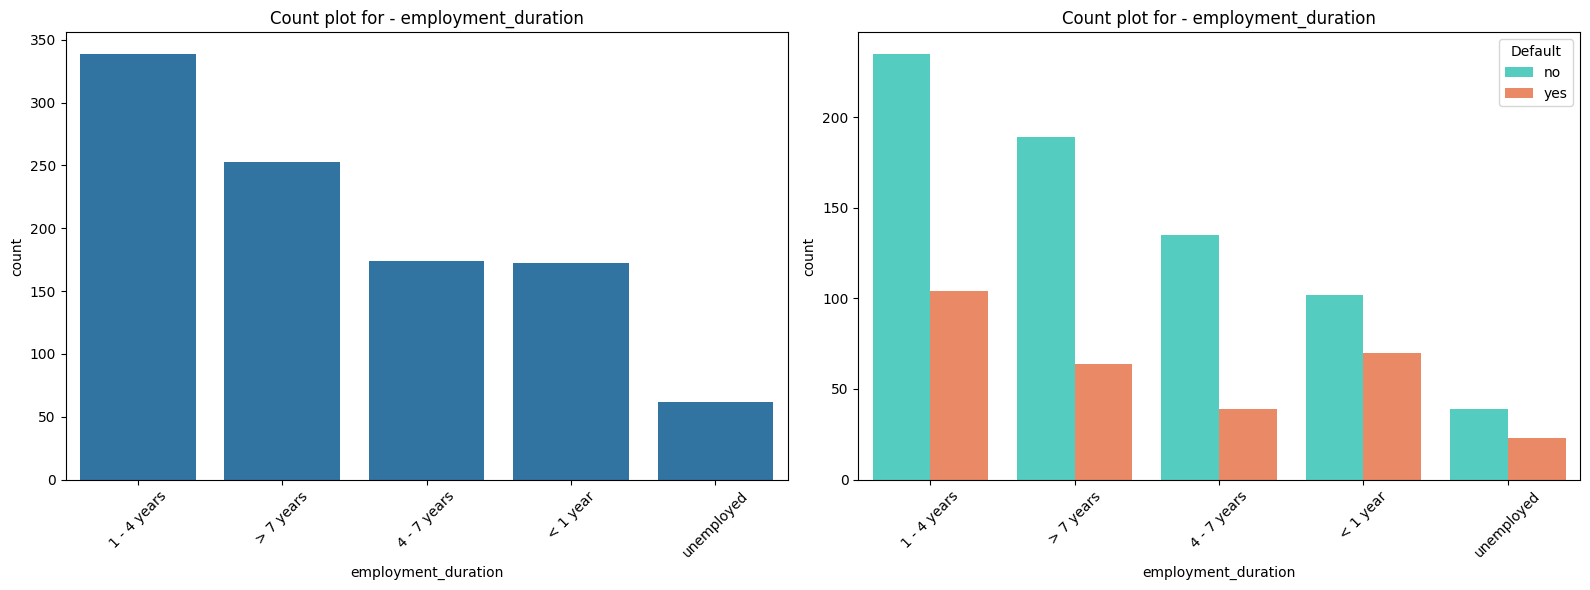

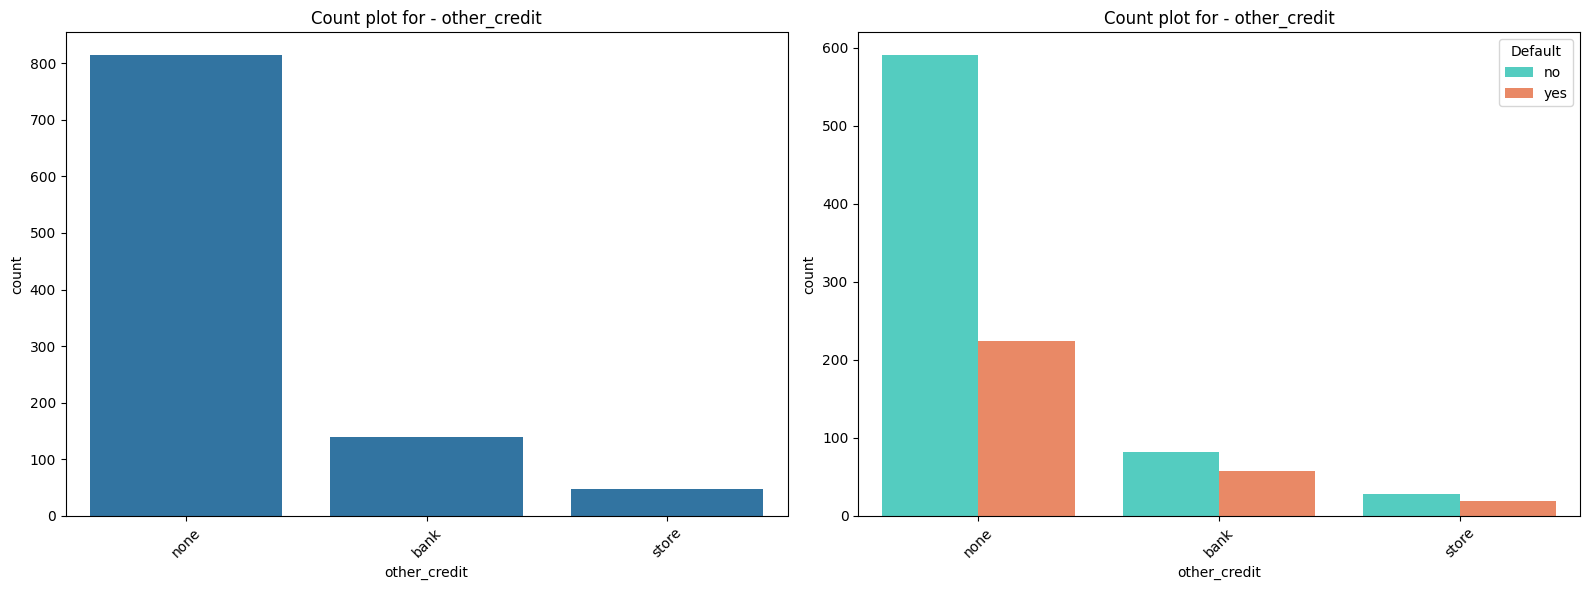

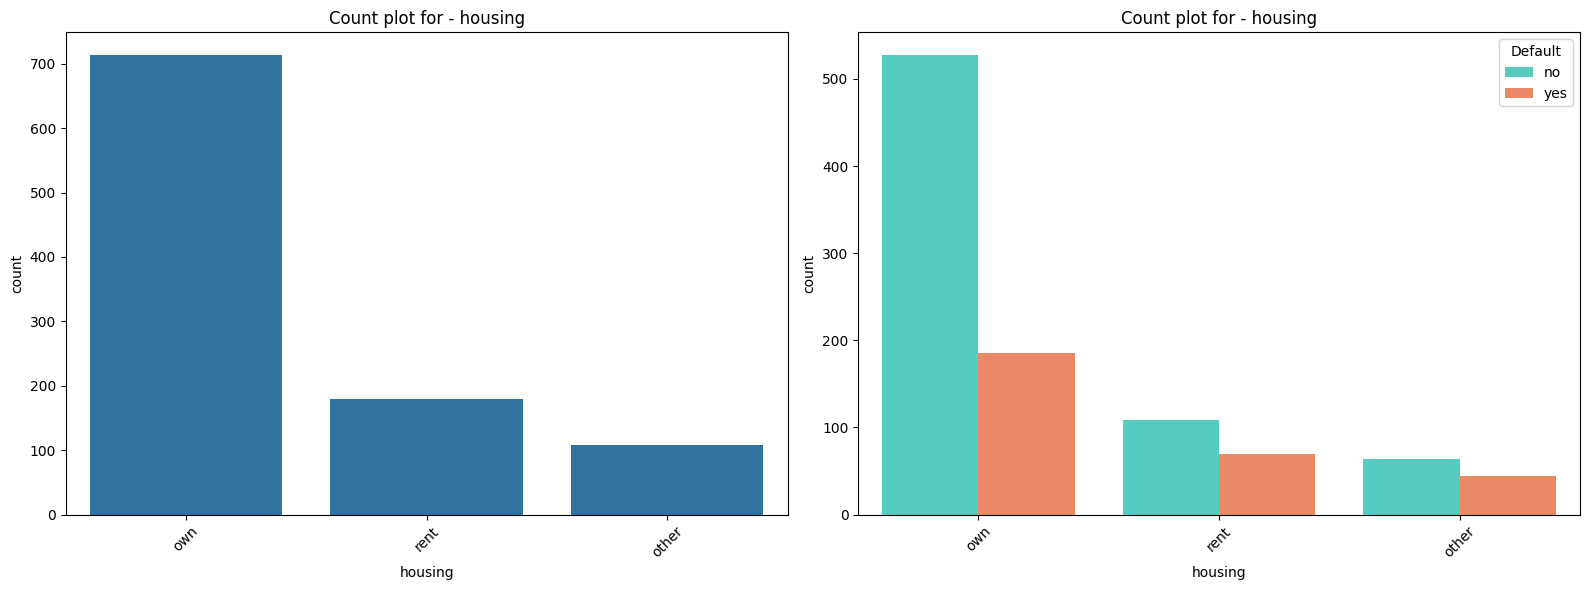

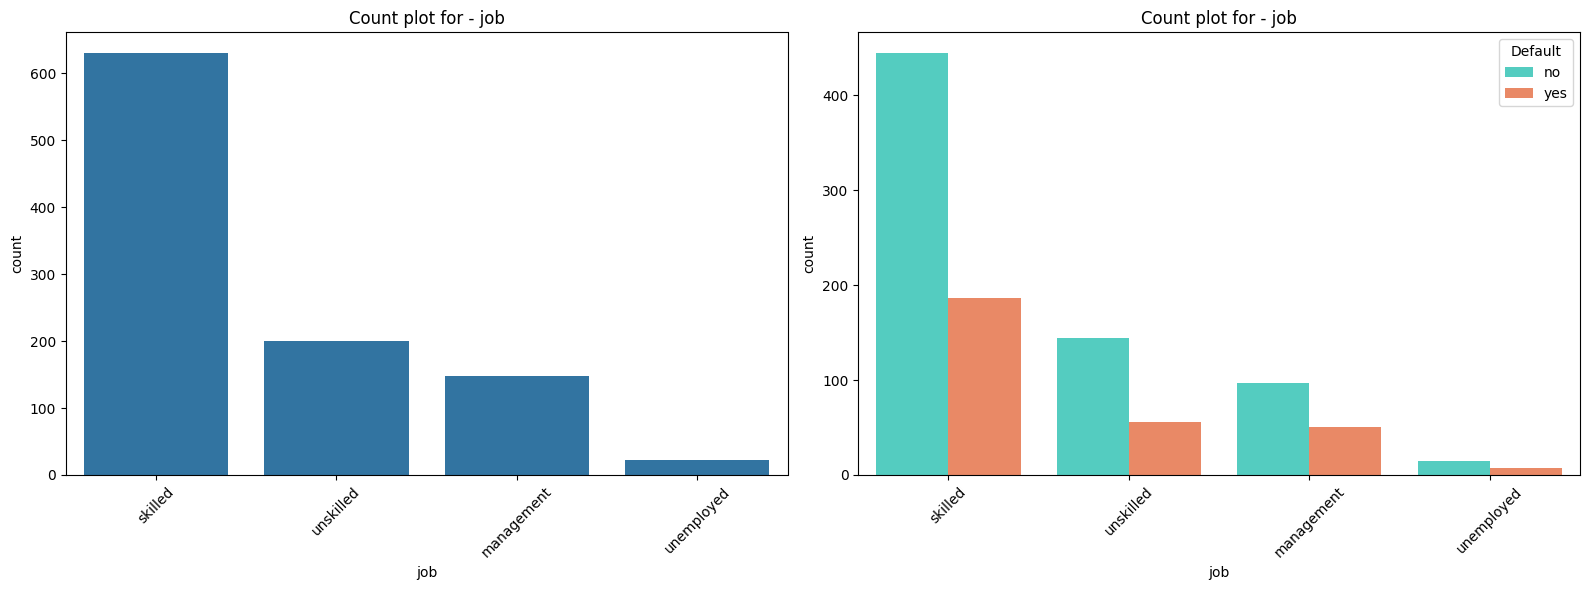

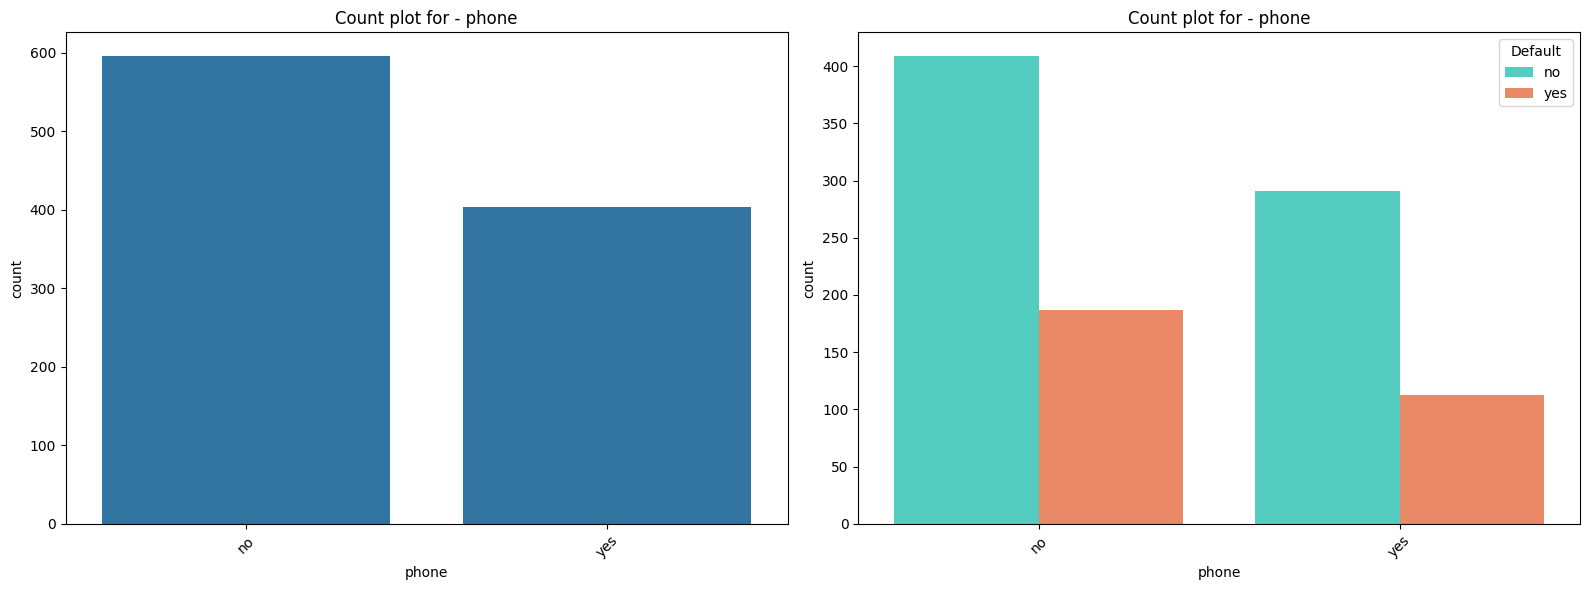

In [ ]:
#Select only categorical columns (exclude 'default' column)
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns = categorical_columns.drop(columns=['default'])

#EDA for each categorical column with and without 'default' as the hue
for categorical_variable in categorical_columns.columns:
    plt.figure(figsize=(16, 6))

    #Count plot without hue='default' (sort by descending order)
    plt.subplot(1, 2, 1)  #First subplot
    sns.countplot(data=df, x=categorical_variable,
                  order=df[categorical_variable].value_counts().index)
    plt.title(f'Count plot for - {categorical_variable}')
    plt.xticks(rotation=45)

    #Count plot with hue='default' (sort by descending order)
    plt.subplot(1, 2, 2)  #Second subplot
    sns.countplot(data=df, x=categorical_variable, hue='default',
                  order=df[categorical_variable].value_counts().index,
                  palette={'yes': 'coral', 'no': 'turquoise'})
    plt.title(f'Count plot for - {categorical_variable}')
    plt.xticks(rotation=45)
    plt.legend(title='Default', loc='upper right')

    plt.tight_layout()
    plt.show()

# ***STEP 3: Well documented Python code to run ML models and make publication-worthy figures or tables.***

**Target variable ['default']** (indicates whether the customer defaulted on the loan or not)


**Predictors variables**
- Numerical Variables: ['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents']
- Categorical Variables:
    - Nominal columns: ['checking_balance', 'purpose', 'savings_balance', 'other_credit', 'housing', 'job', 'phone']
    - Ordinal columns: ['credit_history', 'employment_duration']


NOTE: Some of the columns having 'unknown', 'other', 'none' or 'unemployed' as a category and hence cannot be considered as an ordinal variable even though other categories within the column has a hierrachical order.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Load the CSV file into a DataFrame
csv_filename = 'Germanbankstep1output.csv'
df = pd.read_csv(csv_filename)
print(df.columns)
print(df.info())
df

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                  

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


# ***Encoding***

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#Nominal columns for one-hot encoding
nominal_cols = ['checking_balance', 'purpose', 'savings_balance', 'other_credit', 'housing', 'job', 'phone']
nominal_data = df[nominal_cols]

#OneHotEncoding - Fit and transform on the nominal data
encoder = OneHotEncoder()
encoded_nominal = encoder.fit_transform(nominal_data)

#Encoded nominal features with appropriate names
encoded_nominal_cols = encoder.get_feature_names_out(input_features=nominal_cols)
df_nominal_encoded = pd.DataFrame(encoded_nominal.toarray(), columns=encoded_nominal_cols)
df_nominal_encoded

,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,...,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
996,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

#Ordinal columns with their ordered ranking
ordinal_cols = {
    'credit_history': ['critical', 'poor', 'good', 'very good', 'perfect'],
    'employment_duration': ['unemployed', '< 1 year', '1 - 4 years', '4 - 7 years', '> 7 years']
}

#DataFrame for the ordinal columns
df_ordinal = df[list(ordinal_cols.keys())]

#OrdinalEncoder with specified ordered levels
ordinal_encoder = OrdinalEncoder(categories=[ordinal_cols[col] for col in df_ordinal.columns])

#Fit and transform the ordinal data using the encoder
df_ordinal_encoded = pd.DataFrame(ordinal_encoder.fit_transform(df_ordinal), columns=df_ordinal.columns)

#Adding a suffix to the original column names
encoded_ordinal_suffix = "_encoded"
df_ordinal_encoded.columns = [f"{col}{encoded_ordinal_suffix}" for col in df_ordinal_encoded.columns]
df_ordinal_encoded

,credit_history_encoded,employment_duration_encoded
0,0.0,4.0
1,2.0,2.0
2,0.0,3.0
3,2.0,3.0
4,1.0,2.0
...,...,...
995,2.0,3.0
996,2.0,2.0
997,2.0,4.0
998,2.0,2.0


In [ ]:
#Final dataframe (encoded Categorical variables and available numerical variables)
df_final = pd.concat([df, df_nominal_encoded, df_ordinal_encoded], axis=1)

#Drop the original nominal and ordinal columns
df_final.drop(columns=list(nominal_cols) + list(ordinal_cols.keys()), inplace=True)

#In the 'default' target column, map 'no' to 0 and 'yes' to 1
df_final['default'] = df_final['default'].map({'no': 0, 'yes': 1})
pd.set_option('display.max_columns', None)
print(df_final.columns)
print(df_final.info())
df_final

Index(['months_loan_duration', 'amount', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents',
       'default', 'checking_balance_1 - 200 DM', 'checking_balance_< 0 DM',
       'checking_balance_> 200 DM', 'checking_balance_unknown',
       'purpose_business', 'purpose_car', 'purpose_education',
       'purpose_furniture/appliances', 'purpose_renovations',
       'savings_balance_100 - 500 DM', 'savings_balance_500 - 1000 DM',
       'savings_balance_< 100 DM', 'savings_balance_> 1000 DM',
       'savings_balance_unknown', 'other_credit_bank', 'other_credit_none',
       'other_credit_store', 'housing_other', 'housing_own', 'housing_rent',
       'job_management', 'job_skilled', 'job_unemployed', 'job_unskilled',
       'phone_no', 'phone_yes', 'credit_history_encoded',
       'employment_duration_encoded'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Colum

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes,credit_history_encoded,employment_duration_encoded
0,6,1169,4,4,67,2,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0
1,48,5951,2,2,22,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0
2,12,2096,2,3,49,1,2,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0
3,42,7882,2,4,45,1,2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,3.0
4,24,4870,3,4,53,2,2,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,3.0
996,30,3857,4,4,40,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
997,12,804,4,4,38,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,4.0
998,45,1845,4,4,23,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0


# ***Predictor-Response, Train-Test split and Standard Scaling (Standardization)***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Separate predictors and target
X = df_final.drop(columns=['default'])
y = df_final['default']

#Note: StandardScaler() can be used on the predictors 'X' before the Train-Test split.
#Reference:https://www.kaggle.com/code/igortrevelin/german-credit-risk/notebook#Modeling

#Train-test split (75-25) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

#Initialize StandardScaler and fit-transform on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#Transform the test data
X_test_scaled = scaler.transform(X_test)

# ***Model 1: Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42)

#Fit the model on the training data
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

Logistic Regression - Training Set Performance:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       525
           1       0.65      0.47      0.55       225

    accuracy                           0.77       750
   macro avg       0.72      0.68      0.69       750
weighted avg       0.75      0.77      0.75       750

Logistic Regression - Confusion Matrix (Training Set):
[[468  57]
 [119 106]]



Logistic Regression - Test Set Performance:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       175
           1       0.61      0.48      0.54        75

    accuracy                           0.75       250
   macro avg       0.70      0.67      0.68       250
weighted avg       0.74      0.75      0.74       250



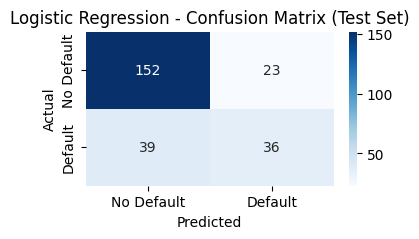

In [ ]:
#Predictions on training data
y_pred_train_logreg = logreg.predict(X_train_scaled)

#Performance metrics on training data
print("Logistic Regression - Training Set Performance:")
print(classification_report(y_train, y_pred_train_logreg))
conf_matrix_train_logreg = confusion_matrix(y_train, y_pred_train_logreg)
print("Logistic Regression - Confusion Matrix (Training Set):")
print(conf_matrix_train_logreg)

#Predictions on test data
y_pred_test_logreg = logreg.predict(X_test_scaled)

#Performance metrics on test data
print("\n\n\nLogistic Regression - Test Set Performance:")
print(classification_report(y_test, y_pred_test_logreg))
conf_matrix_test_logreg = confusion_matrix(y_test, y_pred_test_logreg)

#Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_logreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Logistic Regression - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ***Model 2: Quadratic Discriminant Analysis (QDA)***

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#QDA directly predicts the class-labels, as opposed to a Logistic Regression where the probabilites (of belonging to a class) are the output.
#Hence in QDA, we cannot set any custom/optimal decision threshold for the probabilities to control the 'precision-recall' performance output.

#Initialize Quadratic Discriminant Analysis and fit the model on the training data
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)

QuadraticDiscriminantAnalysis()

Quadratic Discriminant Analysis - Training Set Performance:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       525
           1       0.57      0.35      0.43       225

    accuracy                           0.73       750
   macro avg       0.66      0.62      0.62       750
weighted avg       0.70      0.73      0.70       750

Quadratic Discriminant Analysis - Confusion Matrix (Training Set):
[[466  59]
 [147  78]]



Quadratic Discriminant Analysis - Test Set Performance:
              precision    recall  f1-score   support

           0       0.73      0.82      0.78       175
           1       0.43      0.31      0.36        75

    accuracy                           0.67       250
   macro avg       0.58      0.56      0.57       250
weighted avg       0.64      0.67      0.65       250



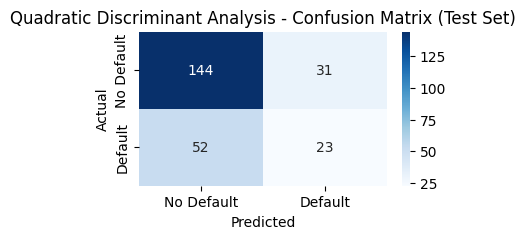

In [ ]:
#Make predictions on training data
y_pred_train_qda = qda.predict(X_train_scaled)

#Performance metrics on training data
print("Quadratic Discriminant Analysis - Training Set Performance:")
print(classification_report(y_train, y_pred_train_qda))
conf_matrix_train_qda = confusion_matrix(y_train, y_pred_train_qda)
print("Quadratic Discriminant Analysis - Confusion Matrix (Training Set):")
print(conf_matrix_train_qda)

#Make predictions on test data
y_pred_test_qda = qda.predict(X_test_scaled)

#Performance metrics on test data
print("\n\n\nQuadratic Discriminant Analysis - Test Set Performance:")
print(classification_report(y_test, y_pred_test_qda))
conf_matrix_test_qda = confusion_matrix(y_test, y_pred_test_qda)

#Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_qda, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Quadratic Discriminant Analysis - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ***Model 3: k-nearest neighbors algorithm (k-NN)***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
#KNN algorithm also outputs the class-label predictions directly instead of probabilities of belonging to a class.

#Initialize K-Nearest Neighbors
knn = KNeighborsClassifier()

#Hyperparameters tuning with GridSearchCV to find the best value of 'k' which gives highest 'recall' performance
param_grid = {
    'n_neighbors': [1, 2, 3, 5, 7]
}

#Fit the grid search on the training data
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

#Best hyperparameters from grid search
best_n_neighbors = grid_search.best_params_['n_neighbors']

#Print the best value of 'k'
print("Best value of 'k':", best_n_neighbors)

#Initialize K-Nearest Neighbors model with the best hyperparameter 'k' value
knn_best = KNeighborsClassifier(n_neighbors=best_n_neighbors)

#Fit the model on the training data
knn_best.fit(X_train_scaled, y_train)

Best value of 'k': 3


KNeighborsClassifier(n_neighbors=3)

K-Nearest Neighbors (with Best 'k') - Training Set Performance:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       525
           1       0.79      0.62      0.69       225

    accuracy                           0.84       750
   macro avg       0.82      0.77      0.79       750
weighted avg       0.83      0.84      0.83       750

K-Nearest Neighbors (with Best 'k') - Confusion Matrix (Training Set):
[[487  38]
 [ 85 140]]



K-Nearest Neighbors (with Best 'k') - Test Set Performance:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       175
           1       0.48      0.40      0.43        75

    accuracy                           0.69       250
   macro avg       0.62      0.61      0.61       250
weighted avg       0.67      0.69      0.68       250



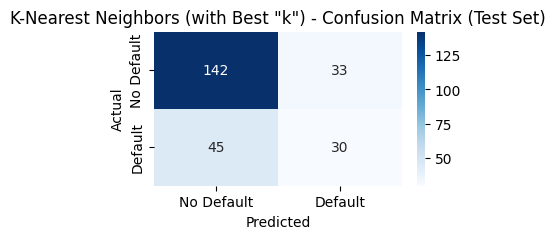

In [ ]:
#Make predictions on training data
y_pred_train_knn = knn_best.predict(X_train_scaled)

#Performance metrics on training data
print("K-Nearest Neighbors (with Best 'k') - Training Set Performance:")
print(classification_report(y_train, y_pred_train_knn))
conf_matrix_train_knn = confusion_matrix(y_train, y_pred_train_knn)
print("K-Nearest Neighbors (with Best 'k') - Confusion Matrix (Training Set):")
print(conf_matrix_train_knn)

#Predictions on test data
y_pred_test_knn = knn_best.predict(X_test_scaled)

#Performance metrics on test data
print("\n\n\nK-Nearest Neighbors (with Best 'k') - Test Set Performance:")
print(classification_report(y_test, y_pred_test_knn))
conf_matrix_test_knn = confusion_matrix(y_test, y_pred_test_knn)

#Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('K-Nearest Neighbors (with Best "k") - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ***Model 4: Support Vector Machine (SVM)***

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

#Initialize Support Vector Machines model
svm = SVC(random_state=42)

#Finding the best hyperparameters (cross-validation) by choosing the one which outputs the highest 'recall' performance
param_grid = {
    'C': [5, 10, 15, 20],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

#Fit the grid search on the training data (GridSearchCV) for hyperparameter tuning (with best 'recall' performance value)
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

#Best hyperparameters values from grid search
best_params = grid_search.best_params_
best_C = best_params['C']
best_kernel = best_params['kernel']
best_gamma = best_params['gamma']
print("Best hyperparameters (having highest 'recall' performance value during cross-validation on Training data):")
print("C:", best_C)
print("Kernel:", best_kernel)
print("Gamma:", best_gamma)

#Initialize Support Vector Machines model with the best hyperparameters
svm_best = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma, random_state=42)

#Fit the model on the training data
svm_best.fit(X_train_scaled, y_train)

Best hyperparameters (having highest 'recall' performance value during cross-validation on Training data):
C: 10
Kernel: rbf
Gamma: scale


SVC(C=10, random_state=42)

Support Vector Machines (with Best Hyperparameters) - Training Set Performance:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       525
           1       0.99      0.92      0.95       225

    accuracy                           0.97       750
   macro avg       0.98      0.96      0.97       750
weighted avg       0.97      0.97      0.97       750

Support Vector Machine (with Best Hyperparameters) - Confusion Matrix (Training Set):
[[523   2]
 [ 19 206]]



Support Vector Machines (with Best Hyperparameters) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       175
           1       0.53      0.44      0.48        75

    accuracy                           0.72       250
   macro avg       0.65      0.64      0.64       250
weighted avg       0.70      0.72      0.71       250



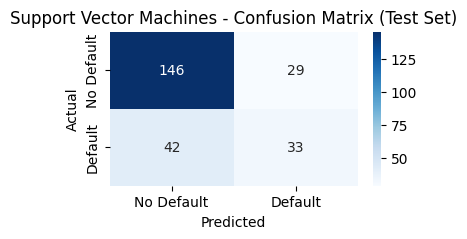

In [ ]:
#Make predictions on training data
y_pred_train_svm = svm_best.predict(X_train_scaled)

#Performance metrics on training data
print("Support Vector Machines (with Best Hyperparameters) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_svm))
conf_matrix_train_svm = confusion_matrix(y_train, y_pred_train_svm)
print("Support Vector Machine (with Best Hyperparameters) - Confusion Matrix (Training Set):")
print(conf_matrix_train_svm)

#Make predictions on test data
y_pred_test_svm = svm_best.predict(X_test_scaled)

#Performance metrics on test data
print("\n\n\nSupport Vector Machines (with Best Hyperparameters) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_svm))
conf_matrix_test_svm = confusion_matrix(y_test, y_pred_test_svm)

#Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Support Vector Machines - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ***Model 5: Random Decision Forest***

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

#Initialize Random Forest model
random_forest = RandomForestClassifier(random_state=42)

#Hyperparameters tuning using GridSearchCV (with 'recall' scoring)
param_grid = {
    'n_estimators': [350, 400, 450],
    'max_depth': [None, 20],
    'min_samples_split': [2, 3, 4]
}

#Fit the grid search on the training data
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

#Best hyperparameters from grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
print("Best hyperparameters:")
print("n_estimators:", best_n_estimators)
print("max_depth:", best_max_depth)
print("min_samples_split:", best_min_samples_split)

#Initialize Random Forest model with best hyperparameters
random_forest_best = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth,
                                            min_samples_split=best_min_samples_split,
                                            random_state=42)

#Fit the model on the training data
random_forest_best.fit(X_train_scaled, y_train)

Best hyperparameters:
n_estimators: 400
max_depth: None
min_samples_split: 3


RandomForestClassifier(min_samples_split=3, n_estimators=400, random_state=42)

Random Forest (with Best Hyperparameters) - Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      1.00      1.00       225

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

Random Forest (with Best Hyperparameters) - Confusion Matrix (Training Set):
[[525   0]
 [  0 225]]



Random Forest (with Best Hyperparameters) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       175
           1       0.62      0.44      0.52        75

    accuracy                           0.75       250
   macro avg       0.70      0.66      0.67       250
weighted avg       0.74      0.75      0.74       250



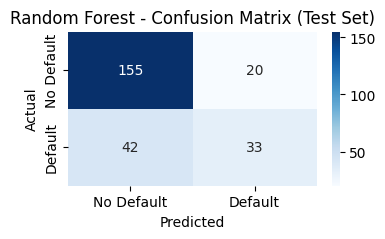

In [30]:
#Predictions on training data
y_pred_train_rf = random_forest_best.predict(X_train_scaled)

#Performance metrics on training data
print("Random Forest (with Best Hyperparameters) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_rf))
conf_matrix_train_rf = confusion_matrix(y_train, y_pred_train_rf)
print("Random Forest (with Best Hyperparameters) - Confusion Matrix (Training Set):")
print(conf_matrix_train_rf)

#Predictions on test data
y_pred_test_rf = random_forest_best.predict(X_test_scaled)

#Performance metrics on test data
print("\n\n\nRandom Forest (with Best Hyperparameters) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_rf))
conf_matrix_test_rf = confusion_matrix(y_test, y_pred_test_rf)

#Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Random Forest - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ***Model 6: Gradient Boosting***

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

#Initialize Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(random_state=42)

#Hyperparameters tuning using GridSearchCV with 'recall' scoring
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [2, 3, 4],
}

#Fit the grid search on the training data
grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

#Best hyperparameters from grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_learning_rate = best_params['learning_rate']
best_max_depth = best_params['max_depth']
print("Best hyperparameters:")
print("n_estimators:", best_n_estimators)
print("learning_rate:", best_learning_rate)
print("max_depth:", best_max_depth)

#Initialize Gradient Boosting model with best hyperparameters
gradient_boosting_best = GradientBoostingClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate,
                                                    max_depth=best_max_depth,
                                                    random_state=42)
#Fit the model on the training data
gradient_boosting_best.fit(X_train_scaled, y_train)

Best hyperparameters:
n_estimators: 100
learning_rate: 0.2
max_depth: 3


GradientBoostingClassifier(learning_rate=0.2, random_state=42)

Custom probability decision threshold: 0.14

Gradient Boosting (with custom Threshold) - Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       525
           1       0.59      1.00      0.74       225

    accuracy                           0.79       750
   macro avg       0.79      0.85      0.78       750
weighted avg       0.87      0.79      0.80       750

Gradient Boosting (with custom Threshold) - Confusion Matrix (Training Set):
[[369 156]
 [  1 224]]



Gradient Boosting (with custom Threshold) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.89      0.56      0.69       175
           1       0.45      0.84      0.59        75

    accuracy                           0.64       250
   macro avg       0.67      0.70      0.64       250
weighted avg       0.76      0.64      0.66       250



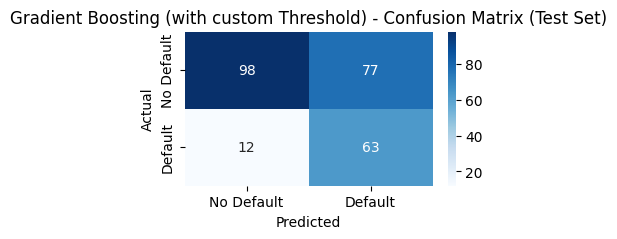

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

#'optimal_threshold' is the input to maintain a balance between precision-recall trade-off.
#The threshold value is further lowered than 'optimal_threshold' to reduce False Negatives.
custom_threshold = 0.14
print("Custom probability decision threshold:", custom_threshold)

#Calculate predicted probabilities for positive class (train and test)
predicted_probabilities_train_gb = gradient_boosting_best.predict_proba(X_train_scaled)[:, 1]
predicted_probabilities_test_gb = gradient_boosting_best.predict_proba(X_test_scaled)[:, 1]

#Make predictions using the custom threshold for both train and test
y_pred_train_gb_custom = (predicted_probabilities_train_gb >= custom_threshold).astype(int)
y_pred_test_gb_custom = (predicted_probabilities_test_gb >= custom_threshold).astype(int)

#Performance metrics on training data using custom threshold
print("\nGradient Boosting (with custom Threshold) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_gb_custom))
conf_matrix_train_gb_custom = confusion_matrix(y_train, y_pred_train_gb_custom)
print("Gradient Boosting (with custom Threshold) - Confusion Matrix (Training Set):")
print(conf_matrix_train_gb_custom)

#Performance metrics on test data using custom threshold
print("\n\n\nGradient Boosting (with custom Threshold) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_gb_custom))
conf_matrix_test_gb_custom = confusion_matrix(y_test, y_pred_test_gb_custom)

#Confusion matrix for test data using custom threshold
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_gb_custom, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Gradient Boosting (with custom Threshold) - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ***Model 7: AdaBoost***

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

#Initialize AdaBoost model
adaboost = AdaBoostClassifier(random_state=42)

#Hyperparameters tuning using GridSearchCV with 'recall' scoring
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'learning_rate': [0.5, 0.6, 0.7, 0.8],
}

#Fit the grid search on the training data
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

#Best hyperparameters from grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_learning_rate = best_params['learning_rate']
print("Best hyperparameters:")
print("n_estimators:", best_n_estimators)
print("learning_rate:", best_learning_rate)

#Initialize AdaBoost model with best hyperparameters
adaboost_best = AdaBoostClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate,
                                   random_state=42)

#Fit the model on the training data
adaboost_best.fit(X_train_scaled, y_train)

Best hyperparameters:
n_estimators: 150
learning_rate: 0.7


AdaBoostClassifier(learning_rate=0.7, n_estimators=150, random_state=42)

AdaBoost (with Best Hyperparameters) - Training Set Performance:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87       525
           1       0.75      0.58      0.65       225

    accuracy                           0.82       750
   macro avg       0.79      0.75      0.76       750
weighted avg       0.81      0.82      0.81       750

AdaBoost (with Best Hyperparameters) - Confusion Matrix (Training Set):
[[482  43]
 [ 95 130]]



AdaBoost (with Best Hyperparameters) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       175
           1       0.57      0.47      0.51        75

    accuracy                           0.74       250
   macro avg       0.68      0.66      0.67       250
weighted avg       0.72      0.74      0.73       250



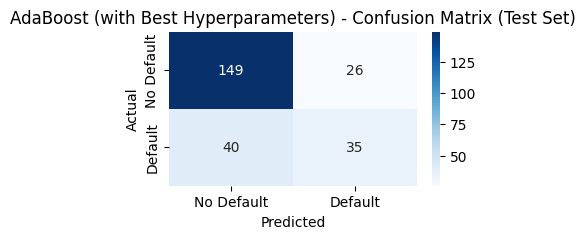

In [34]:
#Predictions on training data
y_pred_train_adaboost = adaboost_best.predict(X_train_scaled)

#Performance metrics on training data
print("AdaBoost (with Best Hyperparameters) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_adaboost))
conf_matrix_train_adaboost = confusion_matrix(y_train, y_pred_train_adaboost)
print("AdaBoost (with Best Hyperparameters) - Confusion Matrix (Training Set):")
print(conf_matrix_train_adaboost)

#Predictions on test data
y_pred_test_adaboost = adaboost_best.predict(X_test_scaled)

#Performance metrics on test data
print("\n\n\nAdaBoost (with Best Hyperparameters) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_adaboost))
conf_matrix_test_adaboost = confusion_matrix(y_test, y_pred_test_adaboost)

#Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_adaboost, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('AdaBoost (with Best Hyperparameters) - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ***Model 8: XGBoost***

In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

#Initialize XGBoost model
xgb = XGBClassifier(random_state=42)

#Hyperparameters tuning using GridSearchCV with 'recall' scoring
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'learning_rate': [0.3, 0.4, 0.5, 0.6],
    'max_depth': [3, 4, 5, 6]
}

#Fit the grid search on the training data
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

#Best hyperparameters from grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_learning_rate = best_params['learning_rate']
best_max_depth = best_params['max_depth']
print("Best hyperparameters:")
print("n_estimators:", best_n_estimators)
print("learning_rate:", best_learning_rate)
print("max_depth:", best_max_depth)

#Initialize XGBoost model with best hyperparameters
xgb_best = XGBClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate,
                         max_depth=best_max_depth,
                         random_state=42)

#Fit the model on the training data
xgb_best.fit(X_train_scaled, y_train)

Best hyperparameters:
n_estimators: 200
learning_rate: 0.3
max_depth: 4


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

XGBoost (with Best Hyperparameters) - Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      1.00      1.00       225

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

XGBoost (with Best Hyperparameters) - Confusion Matrix (Training Set):
[[525   0]
 [  0 225]]



XGBoost (with Best Hyperparameters) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       175
           1       0.54      0.49      0.51        75

    accuracy                           0.72       250
   macro avg       0.66      0.66      0.66       250
weighted avg       0.71      0.72      0.72       250



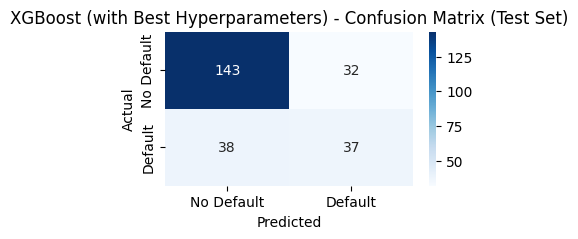

In [39]:
#Predictions on training data
y_pred_train_xgb = xgb_best.predict(X_train_scaled)

#Performance metrics on training data
print("XGBoost (with Best Hyperparameters) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_xgb))
conf_matrix_train_xgb = confusion_matrix(y_train, y_pred_train_xgb)
print("XGBoost (with Best Hyperparameters) - Confusion Matrix (Training Set):")
print(conf_matrix_train_xgb)

#Predictions on test data
y_pred_test_xgb = xgb_best.predict(X_test_scaled)

#Performance metrics on test data
print("\n\n\nXGBoost (with Best Hyperparameters) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_xgb))
conf_matrix_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)

#Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('XGBoost (with Best Hyperparameters) - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ***AUC-PR for Model Selection***

In [40]:
#Statistics for the qualitative categorical columns
df.describe(include=['O']).T

,count,unique,top,freq
checking_balance,1000,4,unknown,394
credit_history,1000,5,good,530
purpose,1000,5,furniture/appliances,473
savings_balance,1000,5,< 100 DM,603
employment_duration,1000,5,1 - 4 years,339
other_credit,1000,3,none,814
housing,1000,3,own,713
job,1000,4,skilled,630
phone,1000,2,no,596
default,1000,2,no,700


**NOTE:**

The 'default' column which has 1000 datapoints, has 700 rows which says 'no' ('0') and remaining 300 rows which indicates the number of customers defaulting on the loan ('yes' or '1').

This can be considered as a moderate to large case of imbalanced-class classification problem.

Hence we calculate the AUC for the PR-curves to select the best performing model instead of an ROC curve (for each model with varying class probability decision thresholds).

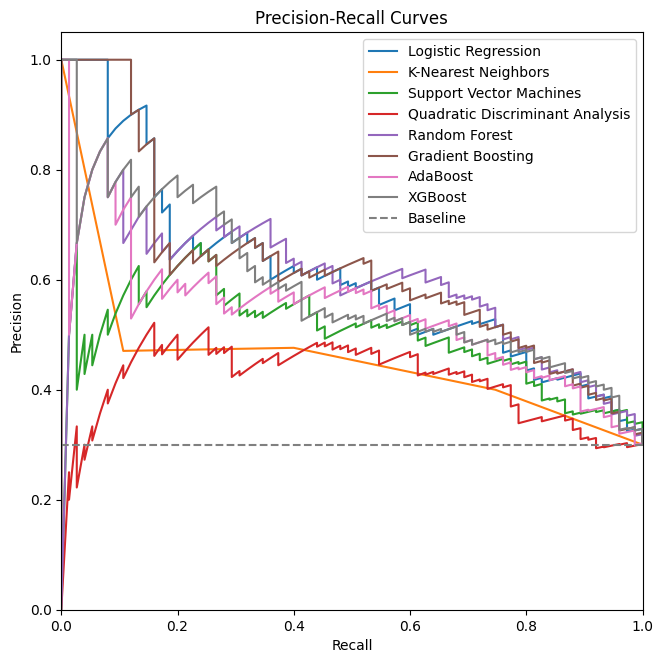

AUC-PR Values (Area Under the Curve in a Precision-Recall plot):
                          Model   AUC-PR
              Gradient Boosting 0.617257
            Logistic Regression 0.607566
                  Random Forest 0.587175
                        XGBoost 0.583114
                       AdaBoost 0.539437
        Support Vector Machines 0.494610
            K-Nearest Neighbors 0.457832
Quadratic Discriminant Analysis 0.411445


In [41]:
from sklearn.metrics import precision_recall_curve, auc

#List of all the model names
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machines',
               'Quadratic Discriminant Analysis', 'Random Forest', 'Gradient Boosting',
               'AdaBoost', 'XGBoost']

#List of corresponding fitted models
fitted_models = [logreg, knn_best, svm_best, qda, random_forest_best, gradient_boosting_best,
                 adaboost_best, xgb_best]

#Dictionary to store precision-recall curve data and AUC-PR values
prc_data = {}
auc_pr_values = []

#Calculate precision-recall curve and AUC-PR for each model
for model_name, model in zip(model_names, fitted_models):
    #Calculate predicted probabilities for positive class
    if hasattr(model, "predict_proba"):
        predicted_probabilities = model.predict_proba(X_test_scaled)[:, 1]
    else:
        predicted_probabilities = model.decision_function(X_test_scaled)

    #Calculate precision-recall curve (i.e., precision and recall values at different threshold points)
    precision, recall, _ = precision_recall_curve(y_test, predicted_probabilities)

    #Calculate AUC-PR (i.e., area under the curve for each model)
    auc_pr = auc(recall, precision)
    auc_pr_values.append(auc_pr)

    #Store data in the dictionary
    prc_data[model_name] = {'precision': precision, 'recall': recall}

#Plot Precision-Recall curves for all models
plt.figure(figsize=(7.5, 7.5))
for model_name in model_names:
    plt.plot(prc_data[model_name]['recall'], prc_data[model_name]['precision'], label=model_name)

#Calculate the ratio of positive and negative samples in the test set
ratio_positives = len(y_test[y_test == 1]) / len(y_test)
ratio_negatives = 1 - ratio_positives

#Plot baseline curve (always predicting majority class)
plt.plot([0, 1], [ratio_positives, ratio_positives], linestyle='--', label='Baseline', color='gray')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='upper right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

#DataFrame for AUC-PR values
auc_pr_df = pd.DataFrame({'Model': model_names, 'AUC-PR': auc_pr_values})

#Sort DataFrame by AUC-PR in descending order
auc_pr_df = auc_pr_df.sort_values(by='AUC-PR', ascending=False)

#Display AUC-PR values
print("AUC-PR Values (Area Under the Curve in a Precision-Recall plot):")
print(auc_pr_df.to_string(index=False))

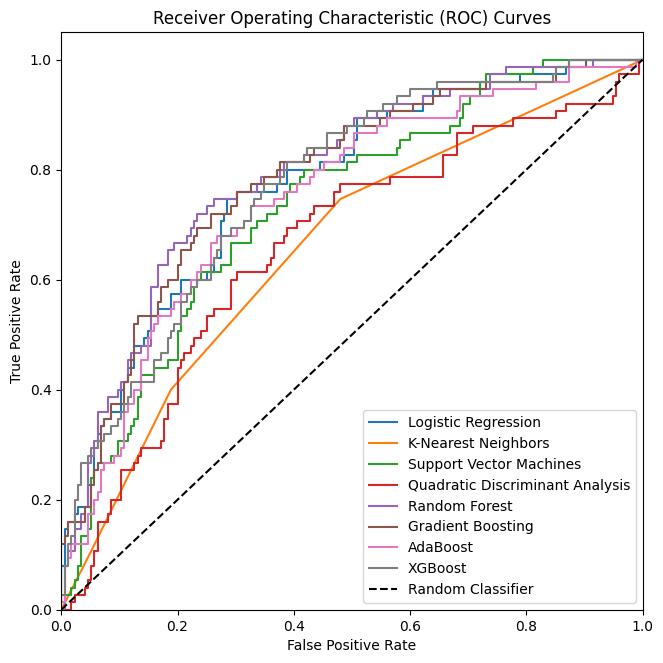

AUC-ROC Values (Area Under the Receiver Operating Characteristic curve):
                          Model  AUC-ROC
                  Random Forest 0.790400
              Gradient Boosting 0.782400
            Logistic Regression 0.772648
                        XGBoost 0.769524
                       AdaBoost 0.746667
        Support Vector Machines 0.733105
Quadratic Discriminant Analysis 0.659276
            K-Nearest Neighbors 0.658705


In [42]:
#For further reference and clarity
from sklearn.metrics import roc_curve, roc_auc_score

#Dictionary to store ROC curve data and AUC-ROC values
roc_data = {}
auc_roc_values = []

#Calculate ROC curve and AUC-ROC for each model
for model_name, model in zip(model_names, fitted_models):
    #Calculate predicted probabilities for positive class
    if hasattr(model, "predict_proba"):
        predicted_probabilities = model.predict_proba(X_test_scaled)[:, 1]
    else:
        predicted_probabilities = model.decision_function(X_test_scaled)

    #Calculate ROC curve (i.e., false positive rate and true positive rate values)
    fpr, tpr, _ = roc_curve(y_test, predicted_probabilities)

    #Calculate AUC-ROC (i.e., area under the curve for each model)
    auc_roc = roc_auc_score(y_test, predicted_probabilities)
    auc_roc_values.append(auc_roc)

    #Store data in the dictionary
    roc_data[model_name] = {'fpr': fpr, 'tpr': tpr}

#Plot ROC curves for all models
plt.figure(figsize=(7.5, 7.5))
for model_name in model_names:
    plt.plot(roc_data[model_name]['fpr'], roc_data[model_name]['tpr'], label=model_name)

#Plot the random classifier line (dashed)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

#DataFrame for AUC-ROC values
auc_roc_df = pd.DataFrame({'Model': model_names, 'AUC-ROC': auc_roc_values})

#Sort DataFrame by AUC-ROC in descending order
auc_roc_df = auc_roc_df.sort_values(by='AUC-ROC', ascending=False)

#Display AUC-ROC values
print("AUC-ROC Values (Area Under the Receiver Operating Characteristic curve):")
print(auc_roc_df.to_string(index=False))

# ***FINAL model: With Custom Threshold (for a higher 'recall' performance)***

AUC-PR Values, i.e., Area Under the Curve in a Precision-Recall plot for an imbalanced classification problem:

                          Model   AUC-PR
              Gradient Boosting 0.619926
            Logistic Regression 0.607566
                  Random Forest 0.587175
                        XGBoost 0.584157

Based on the above AUC-PR values among the top 4 performing models, "Gradient Boosting" has the highest value. Finding an optimal value for the threshold using the "Gradient Boosting" model can be tried, to obtain a satisfactory 'recall' performance value to suit the domain use-case (False Negatives - a defaulter going undetected by the model must be reduced).

A **higher** AUC-PR value for the **"Gradient Boosting" model** indicates that it has **better overall performance** in terms of the trade-off between precision and recall compared to the other models. A **higher AUC-PR value** generally indicates that the **model is able to maintain high precision** while achieving high recall as well, which is especially important for imbalanced datasets.

Optimal Threshold that maximizes F1-score (i.e., optimizing both Precision and Recall): 0.27118255931448304
Optimal Precision: 0.5454545454545454
Optimal Recall: 0.72


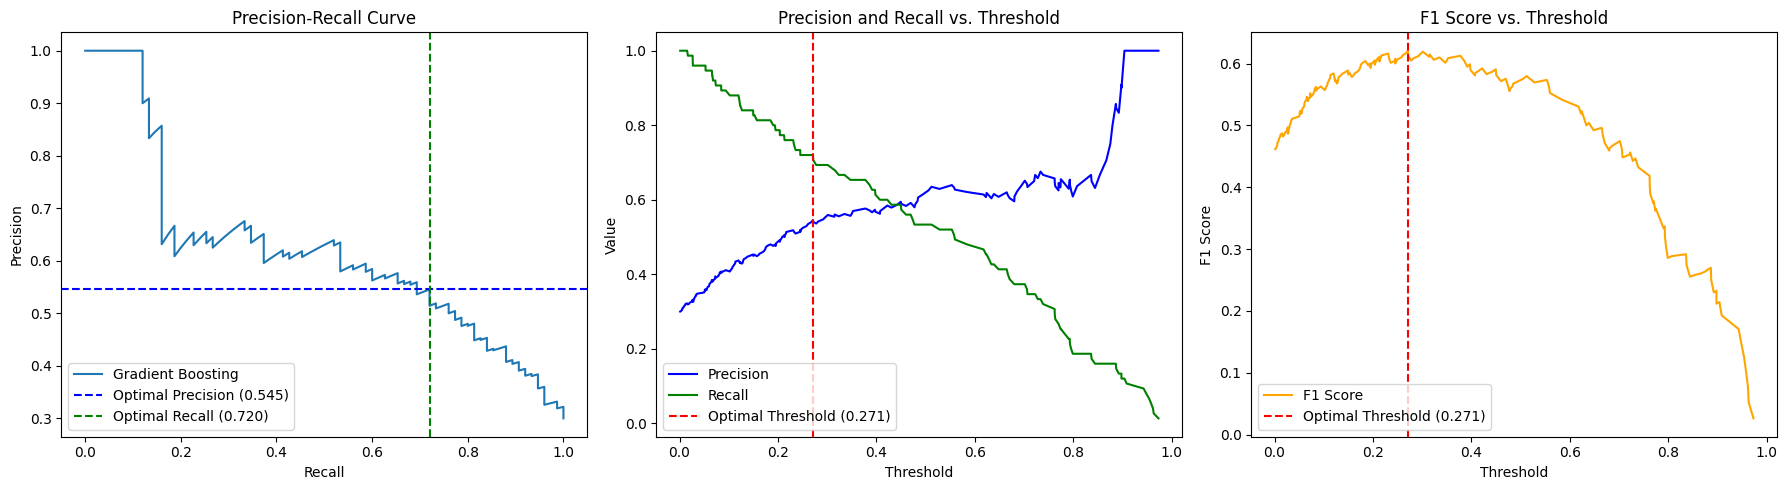

In [43]:
from sklearn.metrics import precision_recall_curve, f1_score
import numpy as np

#Calculate predicted probabilities for positive class
predicted_probabilities = gradient_boosting_best.predict_proba(X_test_scaled)[:, 1]

#Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, predicted_probabilities)

#F1-score for different probability thresholds
f1_scores = 2 * (precision * recall) / (precision + recall)

#Threshold value that maximizes F1-score (i.e., optimizing both Precision and Recall)
optimal_threshold_index = np.argmax(f1_scores)

#Optimal threshold value
optimal_threshold = thresholds[optimal_threshold_index]
optimal_precision = precision[optimal_threshold_index]
optimal_recall = recall[optimal_threshold_index]
print("Optimal Threshold that maximizes F1-score (i.e., optimizing both Precision and Recall):", optimal_threshold)
print("Optimal Precision:", optimal_precision)
print("Optimal Recall:", optimal_recall)

#Plot Precision-Recall curve for different thresholds
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(recall, precision, label='Gradient Boosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.axhline(y=optimal_precision, color='blue', linestyle='--', label=f'Optimal Precision ({optimal_precision:.3f})')
plt.axvline(x=optimal_recall, color='green', linestyle='--', label=f'Optimal Recall ({optimal_recall:.3f})')
plt.legend()

#Plot Precision and Recall VS threshold
plt.subplot(1, 3, 2)
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.3f})')
plt.legend()

#Plot F1-score VS threshold
plt.subplot(1, 3, 3)
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', color='orange')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.legend()
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.3f})')
plt.legend()
plt.tight_layout()
plt.show()

Custom probability decision threshold: 0.14

Gradient Boosting (with custom Threshold) - Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       525
           1       0.59      1.00      0.74       225

    accuracy                           0.79       750
   macro avg       0.79      0.85      0.78       750
weighted avg       0.87      0.79      0.80       750

Gradient Boosting (with custom Threshold) - Confusion Matrix (Training Set):
[[369 156]
 [  1 224]]



Gradient Boosting (with custom Threshold) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.89      0.56      0.69       175
           1       0.45      0.84      0.59        75

    accuracy                           0.64       250
   macro avg       0.67      0.70      0.64       250
weighted avg       0.76      0.64      0.66       250



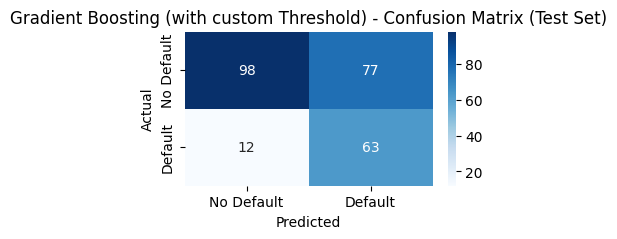

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

#'optimal_threshold' is the input to maintain a balance between precision-recall trade-off.
#The threshold value is further lowered than 'optimal_threshold' to reduce False Negatives.
custom_threshold = 0.14
print("Custom probability decision threshold:", custom_threshold)

#Calculate predicted probabilities for positive class (train and test)
predicted_probabilities_train_gb = gradient_boosting_best.predict_proba(X_train_scaled)[:, 1]
predicted_probabilities_test_gb = gradient_boosting_best.predict_proba(X_test_scaled)[:, 1]

#Make predictions using the custom threshold for both train and test
y_pred_train_gb_custom = (predicted_probabilities_train_gb >= custom_threshold).astype(int)
y_pred_test_gb_custom = (predicted_probabilities_test_gb >= custom_threshold).astype(int)

#Performance metrics on training data using custom threshold
print("\nGradient Boosting (with custom Threshold) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_gb_custom))
conf_matrix_train_gb_custom = confusion_matrix(y_train, y_pred_train_gb_custom)
print("Gradient Boosting (with custom Threshold) - Confusion Matrix (Training Set):")
print(conf_matrix_train_gb_custom)

#Performance metrics on test data using custom threshold
print("\n\n\nGradient Boosting (with custom Threshold) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_gb_custom))
conf_matrix_test_gb_custom = confusion_matrix(y_test, y_pred_test_gb_custom)

#Confusion matrix for test data using custom threshold
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_gb_custom, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Gradient Boosting (with custom Threshold) - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()